# Extracting regions for handwritten marks

In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from dtcv import get_image

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# San Diego Downtown Homless Computer Vision Package
`sandiegodata.org-downtown_cv-4` Last Update: 2019-09-13T01:02:13

_Files and code for analyzing San Diego downtown homelessness  data with computer vision_


This dataset collects records related to a conversion of 5 years of paper maps
that record positions of homeless sleepers in downtown San Diego. The San Diego
Regional Data Library is [converting these paper maps to a digital
form](http://downtown-homelessness.sandiegodata.org/) with a manual process that
uses an image annotation tool, and theses annotations can be used to train
computer vision algorithms to georeference maps and recognize handwritten marks.

These datasets link to map urls and annotations, for three kinds of annotations:

* Ground Control Points, which identify the map image locations for known intersections, linking image coordinates ( in pixels ) to geographic coordinates.
* Image locations of handwritten marks and the number written in the mark.
* File annotations, for other handwritten notes such as the temperature and presence of rain. 

For more discussion about the GCP and handwritten marks, and the tasks in volved
in developing computer vision algorithms for these data, [see our recent blog
post on the subject.
](https://www.sandiegodata.org/2019/09/computer-vision-for-greater-good/)

For some examples of using OpenCV to extract and match templates, to georeference maps, see the [Templates and Clustering Jupyter Notebook](https://nbviewer.jupyter.org/github/sandiegodata-projects/homelessness/blob/master/datasets/sandiegodata.org-downtown_cv/notebooks/Template%20Matching%20Clusters.ipynb)


## Developer notes

After anotation JSON files are copied into S#, the list of S# urls must be
updated. To refresh the list of urls run

    $  bin/update_s3.sh <s3-profile>


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [gcp](data/gcp.csv)**. Ground control points
* ** [intersection_regions](data/intersection_regions.csv)**. Polygon transformations for each the intersections of each map
* ** [intersections](data/intersections.csv)**. List of intersections.
* ** [file_annotations](data/file_annotations.csv)**. File annotations on count files
* ** [counts](data/counts.csv)**. Annotation position, types and counts of handwritten marks

In [3]:
display(pkg.resource('counts'))
counts = pkg.resource('counts').dataframe()

Header,Type,Description
image_url,string,Map image URL
cx,integer,"X value of the center of the circle region, in pixels"
cy,integer,Y value of the center of the circle region in pixels
r,integer,"Radius of the circle region, in pixels"
type,string,"Type of sleeper: Individual, Vehicle or Structure"
count,string,Count of sleepers


In [4]:
# This may take a few minutes; it will download about 330 images and save them to the /tmp directory
counts['image'] = counts.image_url.apply(get_image)

In [5]:
counts.head()

,image_url,cx,cy,r,type,count,image
0,http://ds.civicknowledge.org/downtownsandiego....,654,100,40,Individual,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,http://ds.civicknowledge.org/downtownsandiego....,658,188,34,Individual,6,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,http://ds.civicknowledge.org/downtownsandiego....,656,319,37,Individual,6,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,http://ds.civicknowledge.org/downtownsandiego....,630,411,30,Individual,7,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,http://ds.civicknowledge.org/downtownsandiego....,105,620,57,Individual,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


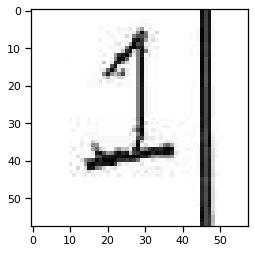

In [11]:
def crop(row):
    """Crop the handwritten mark, and hopefully the shape around it, from the image"""
    x, y, r = row.cx, row.cy, row.r
    
    r = int(r*1.0)
   
    return row.image[y-r:y+r, x-r:x+r ]

plt.imshow(crop(counts.iloc[60]))


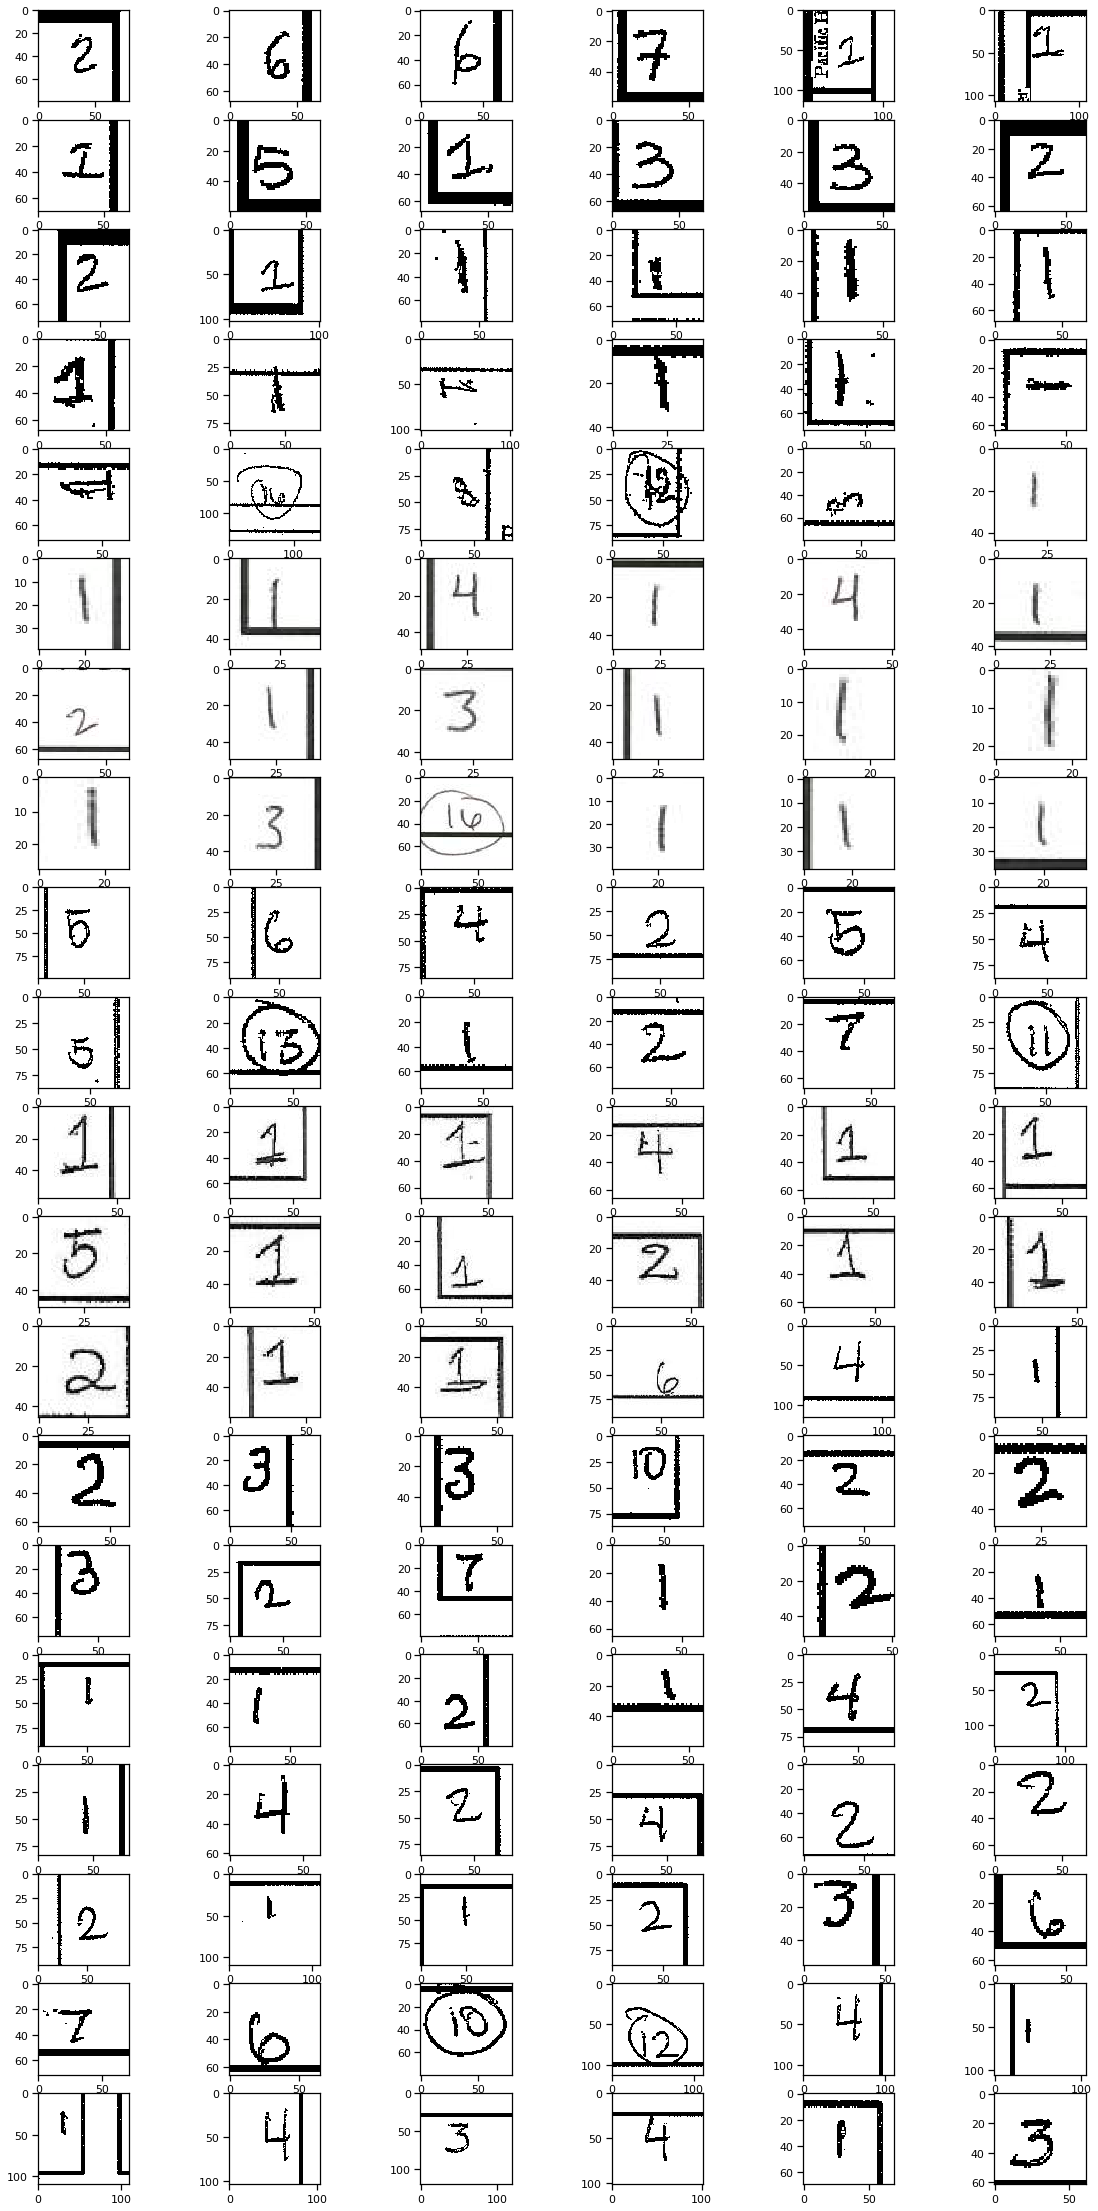

In [12]:
fig, axes = plt.subplots(nrows=20, ncols=6, figsize=(20,40))

for ax, (name, row) in zip(axes.flat, counts.iterrows()):
   
    ax.imshow(crop(row))
    